# Rainfalls in Australia

In [1]:
#%matplotlib notebook
%matplotlib inline

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as ss

from signet.cluster import Cluster
import signet.utils as ut
import matplotlib

In [3]:
direc = 'monthly_uncompressed/'

In [4]:
files = os.listdir(direc)

In [5]:
#files

In [6]:
stat_lat_lon = []

with open(direc + 'HQMR_stations.txt','r') as f:
    for line in f:
        stat_lat_lon.append(line.split(' ')[0:3])


In [7]:

datal = []
for i, file in enumerate(files):
    if file[-5:] =='h.txt':
        data = pd.read_csv(direc+file, sep='   ', parse_dates=[])
        datal.append(data)

/tmp/ipykernel_675220/996172966.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(direc+file, sep='   ', parse_dates=[])
/tmp/ipykernel_675220/996172966.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(direc+file, sep='   ', parse_dates=[])
/tmp/ipykernel_675220/996172966.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(direc+file, sep='   ', parse

In [8]:
datal[0].head()

,PRCP,Unnamed: 1,010541 19070101 20180131 missing_value=99999.9 NYERILUP
0,19070101 19070131,12.4,NaN
1,19070201 19070228,15.4,NaN
2,19070301 19070331,35.9,NaN
3,19070401 19070430,2.3,NaN
4,19070501 19070531,57.5,NaN


In [9]:
datal[0].columns

Index(['PRCP', 'Unnamed: 1',
       ' 010541 19070101 20180131 missing_value=99999.9 NYERILUP'],
      dtype='object')

In [10]:
# inde of stations
stations = []
for d in datal:
    c = d.columns[2].split()[0]
    stations.append(c)

In [11]:
d.columns[2]

' 043026 19100101 20101231 missing_value=99999.9 NORMANDY'

In [12]:
# drop useless columns

for d in datal:
    
    d.drop(columns=[d.columns[2]], inplace = True)

In [13]:
datal[0].head()

,PRCP,Unnamed: 1
0,19070101 19070131,12.4
1,19070201 19070228,15.4
2,19070301 19070331,35.9
3,19070401 19070430,2.3
4,19070501 19070531,57.5


In [14]:
# rename columns
for i,d in enumerate(datal):
    d.columns=["Date", "Rain_"+stations[i]]

In [15]:

#for d in datal:
#    d.Date = pd.to_datetime(d.Date, format = '%Y%m%d')

In [16]:
# set time index
#for d in datal:
#    d.set_index('Date', inplace = True)

In [17]:
#plt.figure()
#datal[13].plot()

In [18]:
datal[0].head()

,Date,Rain_010541
0,19070101 19070131,12.4
1,19070201 19070228,15.4
2,19070301 19070331,35.9
3,19070401 19070430,2.3
4,19070501 19070531,57.5


In [19]:
merge = datal[0]
for i in range(1, len(datal)):
    merge = pd.merge(merge, datal[i], on = 'Date', how = 'inner')
    #merge = pd.merge_asof(merge, datal[i], on = 'Date', left_index=True, right_index=True, direction='nearest')

In [20]:
merge.head()

,Date,Rain_010541,Rain_082001,Rain_092012,Rain_022801,Rain_047039,Rain_090135,Rain_022000,Rain_080004,Rain_018045,...,Rain_036007,Rain_010149,Rain_014401,Rain_029034,Rain_003023,Rain_016083,Rain_050052,Rain_007080,Rain_018073,Rain_043026
0,19690801 19690831,20.8,52.2,92.7,33.6,3.0,67.9,39.6,43.2,27.8,...,0.0,7.9,0.0,0.0,0.0,5.6,28.3,0.0,26.7,9.6
1,19690901 19690930,22.7,138.5,31.8,67.3,12.4,86.5,39.6,22.4,66.1,...,0.0,14.5,0.0,0.0,0.0,4.3,28.1,0.8,35.1,18.8
2,19691001 19691031,6.9,80.2,14.3,4.5,12.7,35.4,4.3,23.7,2.1,...,57.5,0.0,66.8,9.1,0.0,23.7,67.1,1.3,3.0,75.0
3,19691101 19691130,14.5,45.6,78.6,25.9,2.0,31.4,12.7,20.5,20.3,...,0.0,8.9,0.8,3.0,0.0,0.0,112.5,0.5,8.2,92.5
4,19691201 19691231,11.4,82.7,63.8,16.3,11.4,29.7,25.0,28.4,5.3,...,174.0,0.6,155.8,97.2,0.0,6.4,6.0,1.3,1.3,42.3


## Clustering and plot results

In [21]:
Aps = ss.load_npz('plus_cc.npz')
Ams = ss.load_npz('minus_cc.npz')
m = Cluster((Aps, Ams))

(array([71.,  0., 49.,  0., 53.,  0., 63.,  0., 20., 50.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

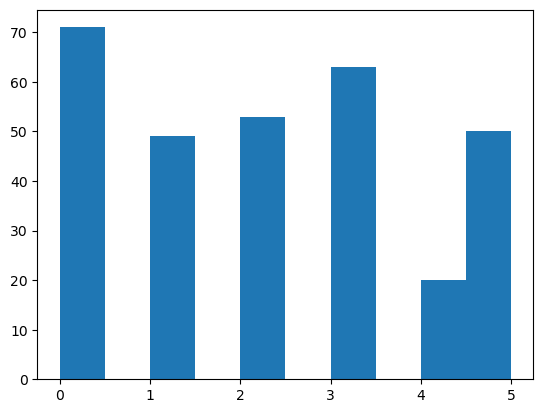

In [24]:
labels = m.SPONGE(6) # np.load('labels6SPONGE.npy')
plt.hist(labels)

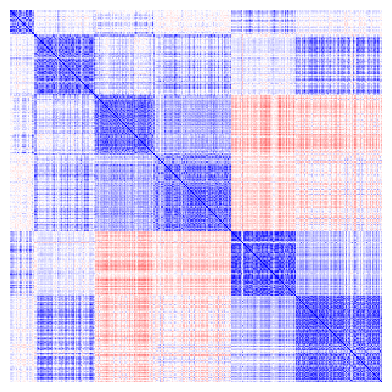

In [25]:
filename='RAINadjLbar'
k=6
preds=labels


x=ut.sizeorder(preds,k,m.p,m.n,True)
ssortedp = m.p.todense()[x,:][:,x]
ssortedn = m.n.todense()[x,:][:,x]
#ax = plot_dense_matrix(ssortedp-ssortedn)
ax=plt.matshow(ssortedp-ssortedn,cmap='bwr_r',vmin=-1,vmax=1)
plt.axis('off')
plt.savefig(filename+'_GE.png', dpi = max(500,min(ssortedp.shape[0]/15,1500)), bbox_inches='tight', pad_inches = 0.25);

In [26]:
stat_lat_lon_a = np.array(stat_lat_lon, dtype = float)
stations_a = np.array(stations, dtype = float)
grouped_coords = []

for i in range(k):
    i_stations = stations_a[preds==i]
    i_coords = []
    
    
    for s in i_stations:
        idx = np.where(stat_lat_lon_a[:,0] == s)
        i_coords.append(stat_lat_lon_a[idx])
    grouped_coords.append(i_coords)

/tmp/ipykernel_675220/1158321455.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('tab10')


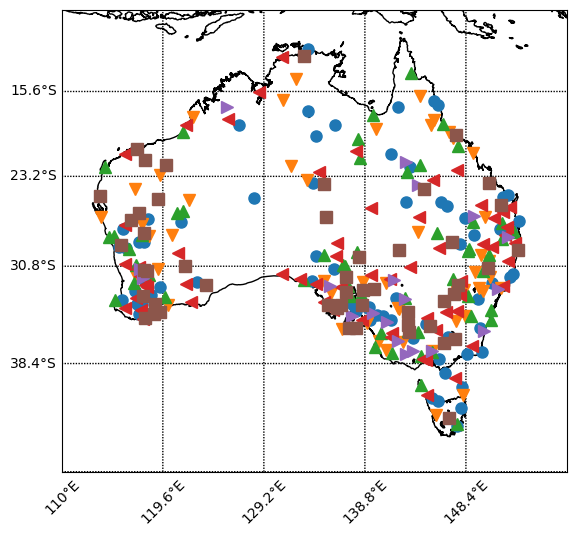

In [27]:
from mpl_toolkits.basemap import Basemap
cmap = matplotlib.cm.get_cmap('tab10')
markers_ = ['o', 'v', '^', '<', '>',  's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', '8']
# input desired coordinates
my_coords = stat_lat_lon_a[0, 1:3]

# How much to zoom from coordinates (in degrees)
zoom_scale = 20

# Setup the bounding box for the zoom and bounds of the map
bbox = [-46, -8, 110, 158]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
mm = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
mm.drawcoastlines()
#m.fillcontinents()


# draw parallels, meridians, and color boundaries
mm.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
mm.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
#m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
colors = ['r', 'g', 'b', 'c', 'y']
markers = []
for i in range(k):
    coords = np.array(grouped_coords[i])[:, 0, 1:3]
    x,y = mm(coords[:,1],coords[:,0])
    mm.plot(x,y, color = cmap(i), markersize=8, lw = 0, marker = markers_[i])



#plt.title("Geographic Point Test")
#plt.tight_layout()
plt.margins(x=0.1)
#plt.savefig('Rainfall_monthly_BH.png', format='png', dpi=500)
plt.savefig('Rainfall_monthly_GE.pdf',  bbox_inches='tight')

plt.show()

In [129]:
Aps.shape

(306, 306)

In [8]:
# np.save('labels6SPONGE',labels)

In [24]:
cuts = np.load('../../result_arrays/rainfall/balanced_cuts100_200_50_0_0_10_3200_10_0_10_5000_L_SSSNET.npy')

In [25]:
cuts

array([[[2.52e+01, 3.35e-01, 3.99e-02]],

       [[2.63e+01, 3.48e-01, 4.11e-02]],

       [[1.91e+01, 2.59e-01, 3.14e-02]],

       [[2.02e+01, 2.72e-01, 3.18e-02]],

       [[2.41e+01, 3.21e-01, 3.86e-02]],

       [[2.41e+01, 3.21e-01, 3.86e-02]],

       [[1.80e+01, 2.43e-01, 2.90e-02]],

       [[1.99e+01, 2.68e-01, 3.13e-02]],

       [[7.37e+01, 9.93e-01, 5.61e-02]],

       [[2.50e+01, 3.32e-01, 3.96e-02]]])

In [20]:
all_ARI = np.load('../../result_arrays/rainfall/all_latest0_200_50_10_0_1_3200_10_0_10_5000_L_SpectralSSSNET.npy')

In [21]:
all_ARI[:,-1]

array([0.68, 0.83, 0.87, 0.83, 0.85, 0.87, 0.89, 0.77, 0.89, 0.79])